# Simulated Event Data

In this notebook, we're collecting the data from both the Harmonic and Bathtub simulations and saving it using Pandas in a `.csv` file.

In [1]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

First up is locating the directory, for this to work on your local machine, change the `path_to_dir' to wherever the files are stored (they aren't stored in this github repo due to storage limitations). This is done to first generate the list of files. 

You'll also need to provide a `path_prefix` to point to the directory from the current notebook's position.

The for loops then should provide a `bathtub_sim_list` and `harmonic_sim_list` which are the relative paths to all the simulated files.

In [2]:
path_to_dir = '/Users/nathan/Desktop/BatchCreatedFiles/' # Path to data

harmonic = 'Harmonic/' # Harmonic Prefix
bathtub = 'Bathtub/' # Bathtub Prefix
# shallowtrap = 'ShallowTrap/' # ShallowTrap Prefix

path_to_harmonic = path_to_dir + harmonic # Path to Harmonic Data
path_to_bathtub = path_to_dir + bathtub # Path to Bathtub Data
# path_to_shallowtrap = path_to_dir + shallowtrap # Path to ShallowTrap Data  

harmonic_list = glob.glob(path_to_harmonic + '/**/*.h5', recursive=True) # List of Harmonic Files
harmonic_sim_list = [] # New List of Harmonic Files

path_prefix = '../../../../' # Path Prefix

for f in harmonic_list: # Iterate through list of Harmonic Files

    suffix = f.split('nathan/')[-1] # Get the suffix of the file
    true_path = path_prefix + suffix # Get the true path of the file
    harmonic_sim_list.append(true_path) # Append the true path to the new list
    
bathtub_list = glob.glob(path_to_bathtub + '/**/*.h5', recursive=True)
bathtub_sim_list = []

for f in bathtub_list:
    suffix = f.split('nathan/')[-1]
    true_path = path_prefix + suffix # Get the true path of the file
    bathtub_sim_list.append(true_path)
    
# shallowtrap_list = glob.glob(path_to_shallowtrap + '/**/*.h5', recursive=True)
# shallowtrap_sim_list = []

# for f in shallowtrap_list:
#     suffix = f.split('nathan/')[-1]
#     true_path = path_prefix + suffix # Get the true path of the file
#     shallowtrap_sim_list.append(true_path)

In [5]:
# np.savetxt('../data/simulations_truth/harmonic_scatter_filenames.csv', np.array(harmonic_sim_list))

HSL = pd.DataFrame(harmonic_sim_list)
print(len(harmonic_sim_list))


# HSL.to_csv('../data/simulations_truth/harmonic_scatter_filenames.csv', index=False)
# np.array(harmonic_sim_list, dtype=str)

3713


['signal1', 'signal2']
['B_bkg [Tesla]', 'Cyclotron frequency [Hertz]', 'Downmixed cyclotron frequency [Hertz]', 'Energy [eV]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Starting position [metres]', 'Starting velocity [metres/second]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]']
[[1.0048571427712552, 27010452267.737232, 118614666.93206406, 18575.0, 26891837600.80517, 89.9, array([0.0009, 0.    , 0.    ]), array([-74088941.24098547, -26553174.5069338 ,   -137363.67554547]), 1e-09, 496.01386174924346, 154.60765618550025, 0.02, 0.005], [1.0048571427712552, 27010452267.737232, 0.0, 18575.0, 26891837600.80517, 89.9, array([0.0009, 0.    , 0.    ]), array([-74088941.24098547, -26553174.5069338 ,   -137363.67554547]), 1e-09, 496.01386174924346, 154.60765618550025, 0.02, 0.005]]


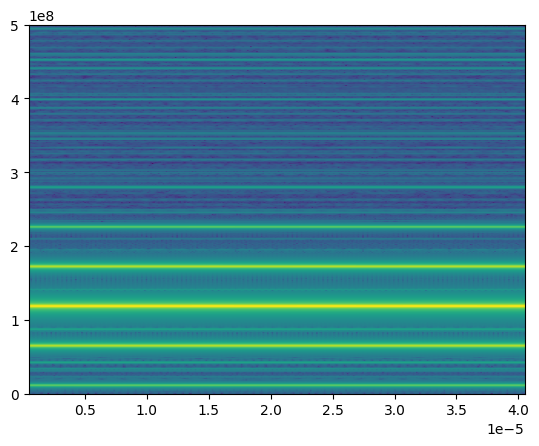

In [9]:
signal_strings, b, data = get_attributes(harmonic_sim_list[0], full_path=True)

print(signal_strings)
print(b)
print(data)

signal = get_signal(harmonic_sim_list[0], signal_strings[0])


plt.specgram(signal, NFFT=1024, Fs=1e9, noverlap=900)
plt.show()


Now that we have `bathtub_sim_list` and `harmonic_sim_list` we need to set up the structure of the data frame or table that we're going to be storing the data in.

We have
- `frame_strings`: The column headers describing the different variables of each simulated event
- `signal_strings`: The column headers describing the different signals of each simulated event (different polarisations 'signal1' and 'signal2')
- `data`: The truth data from the simulated event
- `vars`: The variables of the simulated event with associated data
- `frame`: The data frame of all the simulated events

with some other less important variables scattered throughout. Below is how the scheme works and is implemented into `data_tools.py`. 

In [6]:
frame_strings = [           'File_name',
                               'signal',
                                 'trap',
              'Axial Frequency [Hertz]',     
                        'B_bkg [Tesla]',
                   'Gas density [m^-3]',
                 'LO frequency [Hertz]',
                'Pitch angle [degrees]',
                          'Energy [eV]',
          'Cyclotron frequency [Hertz]',
'Downmixed cyclotron frequency [Hertz]',
                       'Time [seconds]', 
                  'Time step [seconds]',
                        'i_coil [Amps]',
                      'r_coil [metres]',
                        'r_wg [metres]',
         'Starting x position [metres]',
         'Starting y position [metres]',
         'Maxmimum z position [metres]',
         'Starting z position [metres]',
         ]


verbose=True
save_file=False

for i, f in enumerate(harmonic_sim_list):
    signal_strings, b, data = get_attributes(f, full_path=True)
    filename = f.split('/')[-1]
    trap_type = f.split('/')[-2]
    
    # print(signal_strings[0])
    # print(b)
    # print(data[0][0])
    # print(filename)
    # print(trap_type)
    

    
    vars = {
        'File_name': filename,
        'signal': signal_strings[0],
        'trap': trap_type,
        'f_axial': data[0][0],
        'B_bkg': data[0][1],
        'Gas_p': data[0][2],
        'f_lo': data[0][3],
        'pitch_angle': data[0][4],
        'energy': data[0][5],
        'f_cyc': data[0][6],
        'f_cyc_d': data[0][7],
        't': data[0][8],
        'dt': data[0][9],
        'i_coil': data[0][10],
        'r_coil': data[0][11],
        'r_wg': data[0][12],
        'r_x': data[0][14],
        'r_y': data[0][15],
        'r_z_max': data[0][16],
        'r_z': data[0][17],
        
    }
    
    new_frame = pd.DataFrame(vars)
    
    if i == 0:
      frame = pd.DataFrame(vars)
    
    else:
      frame = pd.concat([frame, new_frame], axis=0)
    
    if verbose and i % 100 == 0:
        print(str(i) + ' files processed')

frame.columns = frame_strings

if save_file:
  frame.to_csv('../data/simulations_truth/harmonic_scatters.csv', index=False)

IndexError: list index out of range

In [34]:
harmonic_frame = frame

This time, we'll use the `data_tools.py` file to store the functions and classes that we'll be using to generate the data.

In [5]:
savefile = '../data/simulations_truth/bathtub.csv'

bathtub_frame = get_truth_data(bathtub_sim_list, verbose=False, savefile=False)

In [9]:
path_to_dir_1T = '/Users/nathan/Desktop/1Tesla/v1/' # Path to data

harmonic_1T = 'Harmonic/' # Harmonic Prefix
bathtub_1T = 'Bathtub/' # Bathtub Prefix

path_to_harmonic_1T = path_to_dir_1T + harmonic_1T # Path to Harmonic Data
path_to_bathtub_1T = path_to_dir_1T + bathtub_1T # Path to Bathtub Data

harmonic_list_1T = glob.glob(path_to_harmonic_1T + '/**/*.h5', recursive=True) # List of Harmonic Files
harmonic_sim_list_1T = [] # New List of Harmonic Files

path_prefix = '../../../../' # Path Prefix

for f in harmonic_list_1T: # Iterate through list of Harmonic Files

    suffix = f.split('nathan/')[-1] # Get the suffix of the file
    true_path_1T = path_prefix + suffix # Get the true path of the file
    harmonic_sim_list_1T.append(true_path_1T) # Append the true path to the new list
    
bathtub_list_1T = glob.glob(path_to_bathtub_1T + '/**/*.h5', recursive=True)
bathtub_sim_list_1T = []

for f in bathtub_list_1T:
    suffix = f.split('nathan/')[-1]
    true_path_1T = '../../../../' + suffix
    bathtub_sim_list_1T.append(true_path_1T)


In [10]:
savefile = '../data/simulations_truth/bathtub_1T.csv'

bathtub_frame_1T = get_truth_data(bathtub_sim_list_1T, verbose=False, savefile=savefile)

savefile = '../data/simulations_truth/harmonic_1T.csv'

harmonic_frame_1T = get_truth_data(harmonic_sim_list_1T, verbose=False, savefile=savefile)

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.60790303e+08 2.65015315e+08 2.69160217e+08 2.71605441e+08
 2.76185386e+08 2.90166053e+08 3.37002435e+08]
594.9123724765152
signal1 has a Waveguide impedance [Ohms] equal to 594.9123724765152 Ohms


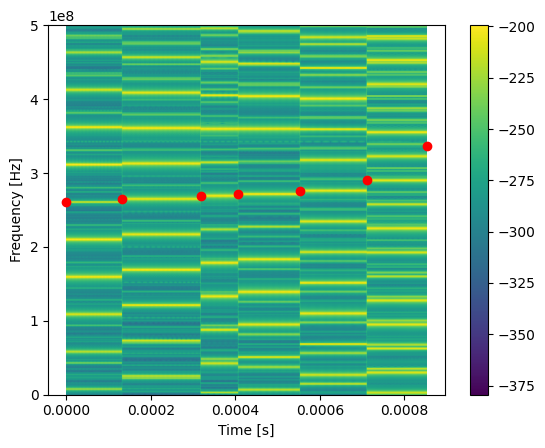

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.79749618e+08 2.82411528e+08 3.04037260e+08 3.04426688e+08
 3.04933493e+08 3.35807513e+08 3.58149127e+08]
594.0251459031015
signal1 has a Waveguide impedance [Ohms] equal to 594.0251459031015 Ohms


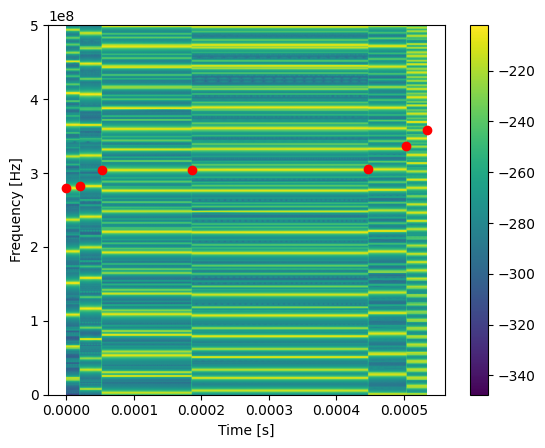

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.97692058e+08 3.61709964e+08]
593.1915858301588
signal1 has a Waveguide impedance [Ohms] equal to 593.1915858301588 Ohms


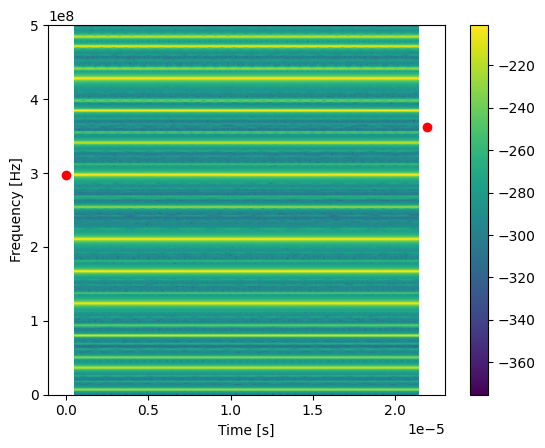

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.69311575e+08 2.73407426e+08 2.72697574e+08 2.88714644e+08
 3.13640134e+08 3.09037275e+08 3.50746970e+08]
594.5127866299721
signal1 has a Waveguide impedance [Ohms] equal to 594.5127866299721 Ohms


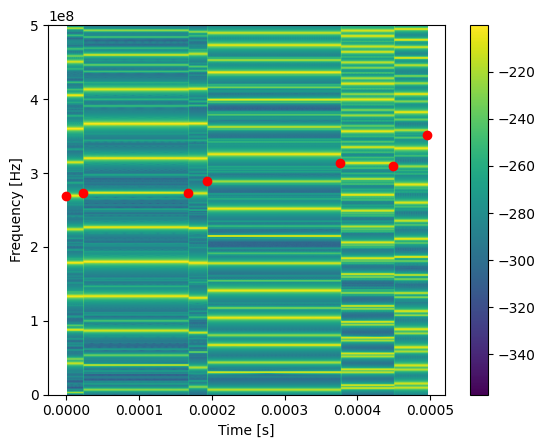

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[3.22587703e+08 3.25728709e+08 3.21491808e+08 2.87200396e+08
 2.83405250e+08 3.17015229e+08 3.19466710e+08 3.58764817e+08]
592.0446707714223
signal1 has a Waveguide impedance [Ohms] equal to 592.0446707714223 Ohms


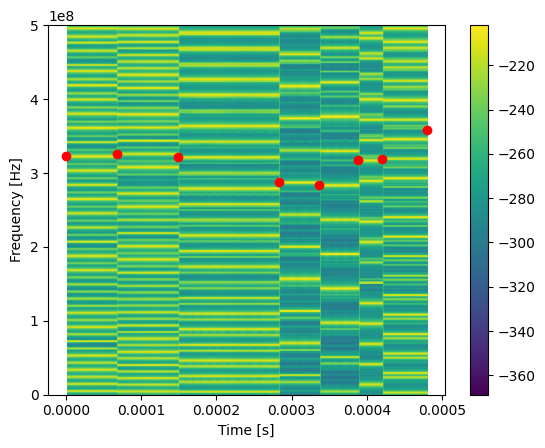

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.89147724e+08 2.88305923e+08 3.43270035e+08 3.42584100e+08
 3.34783187e+08 3.72554839e+08]
593.5878006068257
signal1 has a Waveguide impedance [Ohms] equal to 593.5878006068257 Ohms


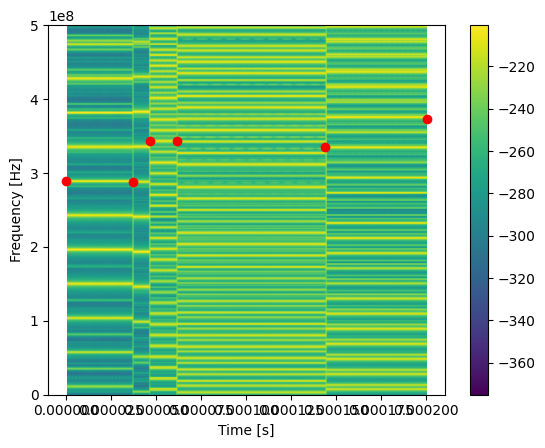

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.71483866e+08 2.65083766e+08 2.69339213e+08 2.79283557e+08
 2.86327509e+08 2.86840822e+08 3.28197444e+08]
594.4111368501582
signal1 has a Waveguide impedance [Ohms] equal to 594.4111368501582 Ohms


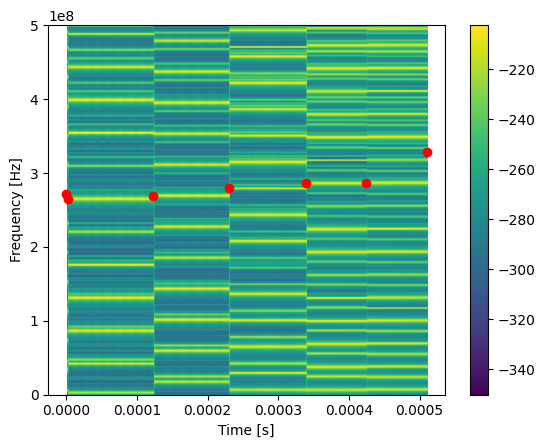

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.84085111e+08 2.87253504e+08 2.66957015e+08 2.86946212e+08
 2.69609993e+08 2.77100165e+08 2.94278851e+08 2.91817147e+08
 2.93913773e+08 2.93909752e+08 2.87464103e+08 2.92313442e+08
 2.75728300e+08]
593.8231906971207
signal1 has a Waveguide impedance [Ohms] equal to 593.8231906971207 Ohms


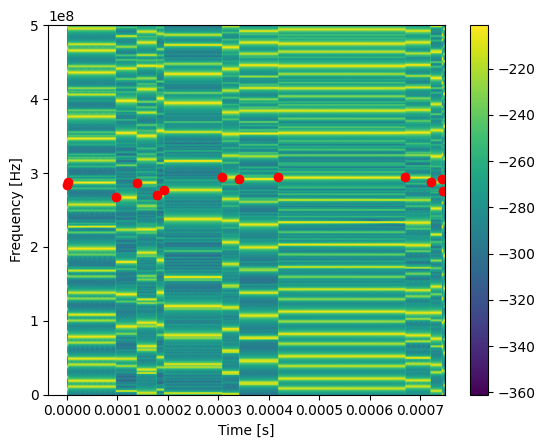

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[2.99491420e+08 3.26856830e+08 3.41580542e+08 3.51374747e+08]
593.1083157345935
signal1 has a Waveguide impedance [Ohms] equal to 593.1083157345935 Ohms


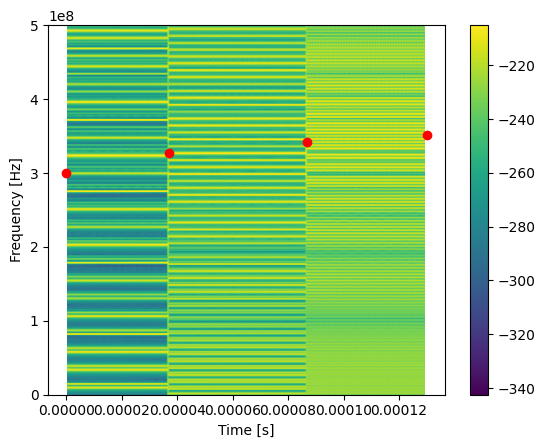

['signal1', 'signal2']
['Axial F [Hertz]', 'B_bkg [Tesla]', 'Gas density [m^-3]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Start E [eV]', 'Start F [Hertz]', 'Start F, downmixed [Hertz]', 'Time [seconds]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]', 'x_start [metres]', 'y_start [metres]', 'z_max [metres]', 'z_start [metres]']
[3.13285541e+08 3.22583114e+08 3.24463041e+08 2.98508468e+08
 3.49411050e+08 3.59892573e+08]
592.4719043025646
signal1 has a Waveguide impedance [Ohms] equal to 592.4719043025646 Ohms


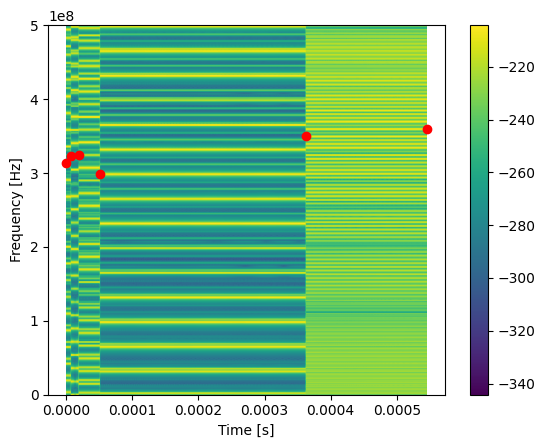

In [72]:
# file = path + '90harmonic.h5'


file = harmonic_sim_list[0]
index = 0

# harmonic_sim_list

for i in range(10):
    file = harmonic_sim_list[i]

    strings, attributes, attributes_values = get_attributes(file, full_path=True)

    print(strings)
    print(attributes)
    print(attributes_values[0][7])


    impedance = attributes_values[index][10]

    print(impedance)

    print(strings[index], "has a", attributes[10], 'equal to', impedance, 'Ohms')

    signal = get_signal(file, strings[index])

    # no_samples = 40960 # For a 40.96 us time slice


    # Plot a spectrogram of the signal

    plt.specgram(signal, NFFT=1024, Fs=1e9, noverlap=900)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar()

    for i in range(len(attributes_values[0][7])):
        plt.scatter(attributes_values[index][8][i],  attributes_values[index][7][i], color='r')


    plt.show()



# signal_fft = np.fft.rfft(signal[:no_samples]) * 16 # Account for power issues, 16 is a scaling factor

# print('Time slice is', no_samples * 1e-9 * 1e6, ' micro seconds')
# print('With a total number of ', len(np.abs(signal_fft)), 'Bins')

# # Noise FFT
# noise = generate_noise(5, no_samples, resistance = impedance)

# noise_fft = np.fft.rfft(noise)

# plt.plot(np.abs(noise_fft))
# plt.plot(np.abs(signal_fft))
# plt.ylabel('FFT Amplitude (V)')
# plt.xlabel('Frequency')
# plt.show()

# # n_fft = np.abs(noise_fft)**2
# # s_fft = np.abs(signal_fft)**2


# # plt.plot(s_fft/impedance)
# # plt.plot(n_fft/impedance)
# # plt.ylabel('Power (A^2/R)')
# # plt.xlabel('Frequency')
# # plt.show()


# sig_val = np.max(abs(signal_fft))
# print(np.max(signal_fft))

In [69]:
attributes_values[0][8]

array([0.        , 0.00013287, 0.00031825, 0.000407  , 0.00055281,
       0.00071049, 0.00085313])

# Plotting

Now that we have the data, we can plot it. We'll plot the data in a few different ways to get a better understanding of what we're looking at. 

First of all we can take a look at the plane of starting positions of the simulated events. This will give us an idea of the distribution of the events.

In [43]:
len(harmonic_sim_list)

274

[[-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0.       ]
 [-0.3520157 -2.1044441  0. 

KeyError: 'Starting position [metres]'

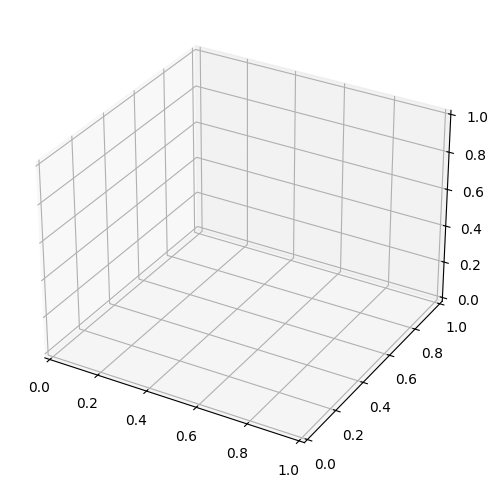

In [ ]:


######################

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.4)

# Large 3D plot on the left
ax3d = fig.add_subplot(grid[:, :3], projection='3d')

positions = np.empty((0, 3))



positions[:,0] = np.array(frame['Starting x position [metres]'].tolist()[0])*1000
positions[:,1] = np.array(frame['Starting y position [metres]'].tolist()[0])*1000
positions[:,2] = np.array(frame['Starting z position [metres]'].tolist()[0])*1000






ax3d.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='green', alpha=0.6, label = 'Initial Pos')
ax3d.set_title('Starting Positions in 3D Space')
ax3d.set_xlabel('X Position [mm]')
ax3d.set_ylabel('Y Position [mm]')
ax3d.set_zlabel('Z Position [mm]')
plt.tight_layout()

# Distance circles 
radii = np.linspace(1, 5, 5)
theta = np.linspace(0, 2 * np.pi, 100)  # Angles for the circle
phi = np.pi / 4  # Fixed angle for the 3D plane (can be adjusted)

colours = ['red', 'blue', 'purple', 'orange', 'pink']

for i, radius in enumerate(radii):
    # Parametric equation of a circle in 3D
    circle_x = radius * np.cos(theta)
    circle_y = radius * np.sin(theta)
    circle_z = 0
    
    circle_label = str(radius) + 'mm'

    ax3d.plot(circle_x, circle_y, circle_z, lw=4, ls='-', c=colours[i], label=circle_label)
    
ax3d.legend()

# Histograms on the right
axes = []
for i in range(3):
    ax_hist = fig.add_subplot(grid[i, 3])
    if i == 0:
        ax_hist.hist(positions[:, 0], bins=50, color='green', alpha=0.6)
        # ax_hist.set_title('X Position Distribution')
        ax_hist.set_xlabel('X Position [mm]')
        ax_hist.set_ylabel('Frequency')
    elif i == 1:
        ax_hist.hist(positions[:, 1], bins=50, color='green', alpha=0.6)
        # ax_hist.set_title('Y Position Distribution')
        ax_hist.set_xlabel('Y Position [mm]')
        ax_hist.set_ylabel('Frequency')
    else:
        pos_magnitudes = np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)
        
        ax_hist.hist(pos_magnitudes, bins=50, color='green', alpha=0.6)
        # ax_hist.set_title('Z Position Distribution')
        ax_hist.set_xlabel('Radius [mm]')
        ax_hist.set_ylabel('Frequency')
        
        for j, radius in enumerate(radii):
            ax_hist.axvline(radius, lw=2, ls='--', label='Circle Radius', c=colours[j])
        
    ax_hist.set_ylabel('Frequency')

plt.savefig('initial_positions.png')

plt.show()

Let us now see the 2d plot of the starting positions of the simulated events along with the 

[1. 2. 3. 4. 5.]
[ 3.14159265 12.56637061 28.27433388 50.26548246 78.53981634]
[ 3.14159265  9.42477796 15.70796327 21.99114858 28.27433388]
[43, 172, 398, 705, 705]
[13.68732511 18.24976681 25.33746694 32.05835282 24.93427442]


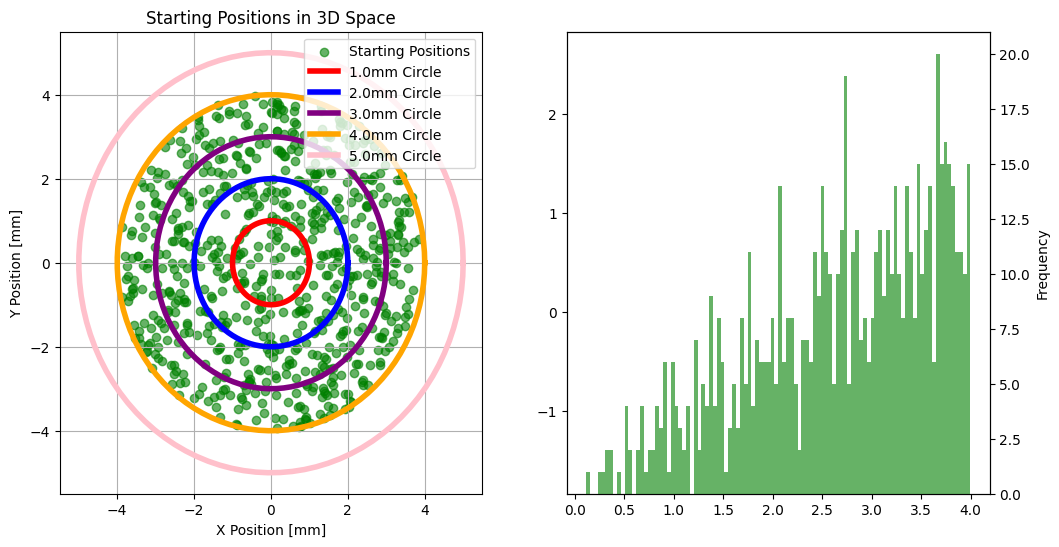

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.gca().set_aspect('equal', adjustable='box')
# Large 3D plot on the left
ax3d = axs[0]
positions = np.array(frame['Starting position [metres]'].tolist())*1000

ax3d.scatter(positions[:, 0], positions[:, 1], c='green', alpha=0.6, label = 'Starting Positions')
ax3d.set_title('Starting Positions in 3D Space')
ax3d.set_xlabel('X Position [mm]')
ax3d.set_ylabel('Y Position [mm]')

# Distance circles 
radii = np.linspace(1, 5, 5)
theta = np.linspace(0, 2 * np.pi, 100)  # Angles for the circle
phi = np.pi / 4  # Fixed angle for the 3D plane (can be adjusted)

colours = ['red', 'blue', 'purple', 'orange', 'pink']

for i, radius in enumerate(radii):
    # Parametric equation of a circle in 3D
    circle_x = radius * np.cos(theta)
    circle_y = radius * np.sin(theta)
    circle_z = 0
    
    circle_label = str(radius) + 'mm Circle'

    ax3d.plot(circle_x, circle_y, lw=4, ls='-', c=colours[i], label=circle_label)
    
ax3d.legend()
ax3d.grid()

# Histograms on the right

ax_hist = axs[1].twinx()

pos_magnitudes = np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)
        
ax_hist.hist(pos_magnitudes, bins=100, color='green', alpha=0.6)
# ax_hist.hist(positions[:, 0], bins=100, color='yellow', alpha=0.6)
# ax_hist.hist(positions[:, 1], bins=100, color='cyan', alpha=0.6)        

ax_hist.set_xlabel('X Position [mm]')
ax_hist.set_ylabel('Frequency')


print(radii)

# Work out areas of concentric rings, not circles
areas = np.pi * radii**2
print(areas)

for i in range(len(areas)):
    areas[i] = areas[i] - np.sum(areas[:i])
    
print(areas)


# Calculate the number of points within each circle
n_points = []
for i, radius in enumerate(radii):
    n_points.append(np.sum(pos_magnitudes < radius))
    
print(n_points)

print(n_points / areas)

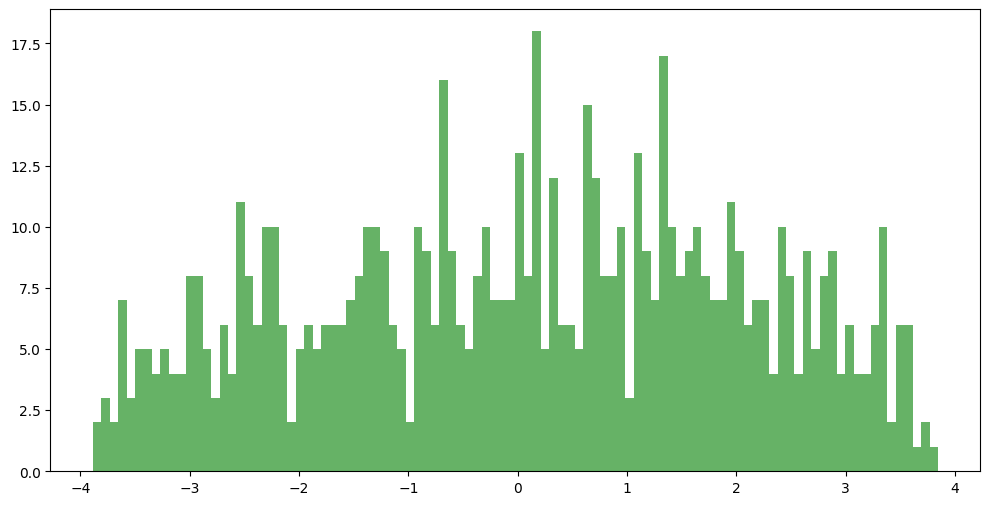

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(positions[:, 0], bins=100, color='green', alpha=0.6, label='X Position')

plt.show()

# Fluff

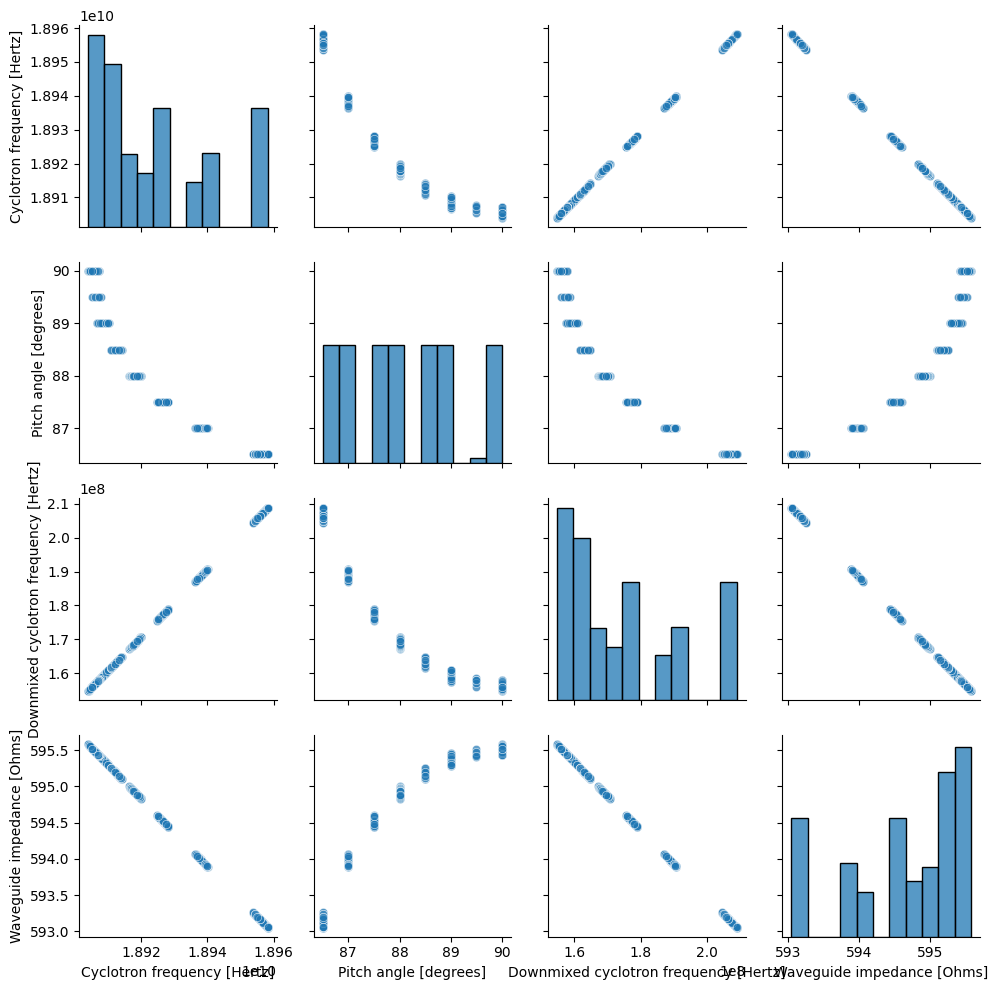

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Pairplot for continuous variables
continuous_cols = [
     'Cyclotron frequency [Hertz]', 
    
 'Pitch angle [degrees]', 
 'Downmixed cyclotron frequency [Hertz]', 
    'Waveguide impedance [Ohms]'
]
sns.pairplot(frame[continuous_cols], plot_kws={'alpha': 0.7})
plt.tight_layout()
plt.show()




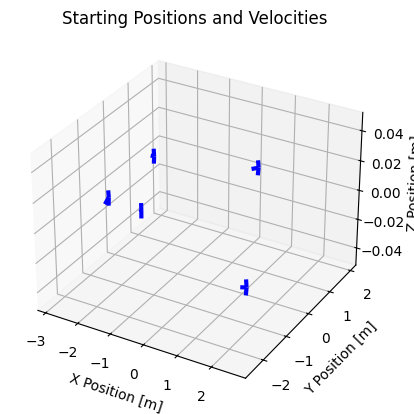

In [ ]:
total = 5

# Quiver plot for starting positions and velocities
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Positions and velocities
velocities = np.array(frame['Starting velocity [metres/second]'].tolist())

# Quiver with custom arrow properties
quiver = ax.quiver(
    positions[:total, 0], positions[:total, 1], positions[:total, 2],  # Starting points
    velocities[:total, 0], velocities[:total, 1], velocities[:total, 2],  # Velocity vectors
    length=0.2,  # Adjust length scaling of arrows
    normalize=True,  # Normalize arrows to the same length
    arrow_length_ratio=0.1,  # Ratio of arrowhead to shaft
    color='blue',  # Custom colour for arrows
    linewidths=3  # Thickness of arrows
    
)

# Labels and title
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_zlabel('Z Position [m]')
plt.title('Starting Positions and Velocities')
plt.show()


# # Boxplot for categorical comparisons
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=frame, x='signal', y='Energy [eV]', hue='trap')
# plt.title('Energy Distribution by Signal and Trap Type')
# plt.ylabel('Energy [eV]')
# plt.xlabel('Signal')
# plt.legend(title='Trap Type')
# plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Extract positions and velocities from your dataset
positions = np.array(frame['Starting position [metres]'].tolist())
velocities = np.array(frame['Starting velocity [metres/second]'].tolist())

normalised_velocities = velocities / np.linalg.norm(velocities, axis=1)[:, None]

tiny_velocities = normalised_velocities * 0.001


# Compute arrow endpoints
ends = positions + tiny_velocities

# Normalise ends

total_no = 30

fig = go.Figure()

# Add starting positions as scatter points
fig.add_trace(go.Scatter3d(
    x=positions[:total_no, 0],
    y=positions[:total_no, 1],
    z=positions[:total_no, 2],
    mode='markers',
    marker=dict(size=5, color='red', symbol='circle'),
    name='Starting Positions'
))

# Add arrows with arrowheads
for i in range(total_no):
    # Arrow shaft
    fig.add_trace(go.Scatter3d(
        x=[positions[i, 0], ends[i, 0]],
        y=[positions[i, 1], ends[i, 1]],
        z=[positions[i, 2], ends[i, 2]],
        mode='lines',
        line=dict(color='blue', width=6),
        showlegend=False
    ))

    # # Arrowhead (a small scatter point at the endpoint for visualisation)
    # fig.add_trace(go.Scatter3d(
    #     x=[ends[i, 0]],
    #     y=[ends[i, 1]],
    #     z=[ends[i, 2]],
    #     mode='markers',
    #     marker=dict(size=4, color='blue', symbol='triangle-up'),
    #     name='Arrowhead' if i == 0 else '',  # Only show "Arrowhead" once in the legend
    #     showlegend=(i == 0)  # Only show the legend for the first arrowhead
    # ))

# Set axis labels and layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Position [m]',
        yaxis_title='Y Position [m]',
        zaxis_title='Z Position [m]'
    ),
    title='Interactive 3D Quiver Plot with Arrowheads',
    showlegend=True
)

# Display the plot
fig.show()

In [12]:
harmonic_sim_list

['../../../../Desktop/v2/Harmonic/89.5deg/out_087f4090-6cee-4257-9be1-0de405dd2039.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_6f5f153d-9547-45d0-85e1-43d3d000b8da.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_799f6692-0430-41a6-a871-95d8f41fec27.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_5aefc6d4-937f-421b-85e6-7fc6ab6779b9.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_38e7d13f-ef18-4a3e-96df-41d21828feee.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_815e33d9-de04-4770-b47d-cd38878b44e0.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_4bdd96ee-d07c-4724-9f10-98a4126cc86b.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_4cb21535-b836-4095-8199-f9c6da7ad33e.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_87c3c1c3-8ec2-4c03-aa06-bca03125a1aa.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_8ff2c9ff-7114-4973-b927-1932b283bfae.h5',
 '../../../../Desktop/v2/Harmonic/89.5deg/out_ca1fdd91-bafb-4a8c-b157-fa6fde377f4e.h5',
 '../../../../Desktop/v2/Harmoni